# Bodie Franklin NLP HW #8

## Grab Data from #HW 5

In [46]:
%%time
import bs4 as bs
import urllib.request
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
import itertools
import nltk
from nltk.tokenize import word_tokenize
import pprint
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk    import SnowballStemmer
from unidecode    import unidecode
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn import cluster
import matplotlib.pyplot  as plt

Wall time: 622 ms


In [36]:
%%time

reviews = []
review_link = []

the_dark_knight = "https://www.imdb.com/title/tt0468569/reviews?ref_=tt_urv"
sauce= urllib.request.urlopen(the_dark_knight).read()
soup = bs.BeautifulSoup(sauce,'lxml')
    
for a in soup.find_all('a',href=True):
        reviews.append(a['href'])

Infinite = "https://www.imdb.com/title/tt6654210/reviews?ref_=tt_urv"
sauce= urllib.request.urlopen(Infinite).read()
soup = bs.BeautifulSoup(sauce,'lxml')
    
for a in soup.find_all('a',href=True):
        reviews.append(a['href'])
        
Awake = "https://www.imdb.com/title/tt10418662/reviews?ref_=tt_urv"
sauce= urllib.request.urlopen(Awake).read()
soup = bs.BeautifulSoup(sauce,'lxml')
    
for a in soup.find_all('a',href=True):
        reviews.append(a['href'])
        

F9 = "https://www.imdb.com/title/tt5433138/reviews?ref_=tt_urv"
sauce= urllib.request.urlopen(F9).read()
soup = bs.BeautifulSoup(sauce,'lxml')
    
for a in soup.find_all('a',href=True):
        reviews.append(a['href'])
                

hitman_wife = "https://www.imdb.com/title/tt8385148/reviews?ref_=tt_urv"
sauce= urllib.request.urlopen(hitman_wife).read()
soup = bs.BeautifulSoup(sauce,'lxml')
    
for a in soup.find_all('a',href=True):
        reviews.append(a['href'])
            

    
PartialWord ="/review/"
clean_reviews = list(set([word for word in reviews if word.startswith(PartialWord)]))


for i in (clean_reviews):
    review_link.append('https://www.imdb.com/'+i+'?ref_=tt_urv')



reviews_text = []


for i in review_link:
    link = i
    sauce= urllib.request.urlopen(link).read()
    soup = bs.BeautifulSoup(sauce,'lxml')
    
    for div in soup.find_all('div',class_="text show-more__control"):
        reviews_text.append(div.text)

Wall time: 1min 2s


## Convert HW 5 results into DATAFRAME

In [57]:
reviews = pd.DataFrame(reviews_text,columns=['review'])
reviews.head()

,review
0,unless like hear word everi sentenc movi n't s...
1,walk thirti minut could n't take anymor amount...
2,wow critic went real hard one fulli engag stat...
3,movi could n't hold interest much finish hope ...
4,movi interest premis like greenland anoth disa...


## Grab Clustering Code

In [44]:
%%time
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    
    
    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)
        listOfTokens = applyStemming(listOfTokens, param_stemmer)
        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

Wall time: 0 ns


In [48]:
%%time
language = 'english'
corpus = processCorpus(reviews_text, language)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

125 rows
Wall time: 227 ms


,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
schooler,0.285804,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentenc,0.285804,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
middl,0.263272,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
annoy,0.247286,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hear,0.234886,0.0,0.081488,0.0,0.0,0.160359,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Wall time: 16.6 ms
Wall time: 59.8 ms


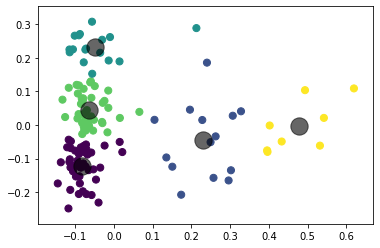

In [53]:
%%time
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_clusters = 5
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(final_df)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600, algorithm = 'auto')
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)

Wall time: 13.1 ms
Wall time: 42.7 ms


C:\Users\bodie\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


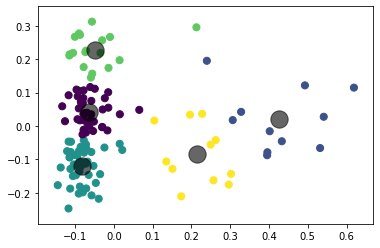

In [54]:
%%time
from sklearn.cluster import DBSCAN

n_clusters = 5
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(final_df)
kmeans = KMeans(
    init='k-means++',    
    n_clusters=n_clusters,    
    n_init=1,         
    n_jobs=-1)
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)

## Build sentiment analyzer from Course Book

In [31]:
%%time
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
import numpy as np
import pandas as pd 
import nltk


wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

def display_evaluation_metrics(true_labels, predicted_labels, positive_class=1): 
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels,predicted_labels)))
    print('Precision:', np.round( metrics.precision_score(true_labels, predicted_labels, pos_label=positive_class, average='binary')))
    print('Recall:', np.round( metrics.recall_score(true_labels, predicted_labels, pos_label=positive_class, average='binary')))
    print('F1 Score:', np.round( metrics.f1_score(true_labels, predicted_labels, pos_label=positive_class, average='binary')))



from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

def build_feature_matrix(documents, feature_type='frequency', 
                         ngram_range=(1, 1), min_df=0.0, max_df=1.0): 
    feature_type = feature_type.lower().strip()   
    if feature_type == 'binary': 
        vectorizer = CountVectorizer(binary=True, min_df=min_df, 
                                     max_df=max_df, ngram_range=ngram_range) 
    elif feature_type == 'frequency': 
        vectorizer = CountVectorizer(binary=False, min_df=min_df, 
                                         max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'tfidf': 
        vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, ngram_range=ngram_range) 
    else: 
            raise Exception("Wrong feature type entered. Possible values: 'binary', 'frequency', 'tfidf'") 
            
    feature_matrix = vectorizer.fit_transform(documents).astype(float) 
        
    return vectorizer, feature_matrix
    


Wall time: 0 ns


In [41]:
%%time
import pandas as pd
import numpy as np

from sklearn.linear_model import SGDClassifier

dataset = pd.read_excel("C:/Users/bodie/Documents/Movies_Data.xlsx")

print(dataset.head())

train_data = dataset[:35000]
test_data = dataset[35000:]

train_reviews = np.array(train_data['review'])
train_sentiments = np.array(train_data['sentiment'])
test_reviews = np.array(test_data['review'])
test_sentiments = np.array(test_data['sentiment'])


sample_docs = [100, 5817, 7626, 7356, 1008, 7155, 3533, 13010]
sample_data = [(test_reviews[index],
                test_sentiments[index])
                  for index in sample_docs]

sample_data    

# normalization
norm_train_reviews = normalize_corpus(train_reviews)
                                    

# feature extraction                                                                            
vectorizer, train_features = build_feature_matrix(documents=norm_train_reviews,
                                                  feature_type='tfidf',
                                                  ngram_range=(1, 1), 
                                                  min_df=0.0, max_df=1.0)                                      
                                      
                                      

svm = SGDClassifier(loss='hinge', max_iter=500)
svm.fit(train_features, train_sentiments)



# normalize reviews                        
norm_test_reviews = normalize_corpus(test_reviews)
                                      
# extract features                                     
test_features = vectorizer.transform(norm_test_reviews)

predicted_sentiments = svm.predict(test_features) 

                                              review sentiment
0  "One of the other reviewers has mentioned that...  positive
1  "A wonderful little production. <br /><br />Th...  positive
2  "I thought this was a wonderful way to spend t...  positive
3  "Basically there's a family where a little boy...  negative
4  "Petter Mattei's ""Love in the Time of Money""...  positive
Wall time: 29.3 s


# Question 1

In [43]:
%%time
HW_FIVE_reviews = np.array(reviews['review'])

HW_FIVE_reviews_norm = normalize_corpus(HW_FIVE_reviews)
                                    
HW_FIVE_reviews_norm = vectorizer.transform(HW_FIVE_reviews_norm)
    
predicted_HW5_sentiemnts =  svm.predict(HW_FIVE_reviews_norm)                                     
                                      
                                      
predicted_HW5_sentiemnts

Wall time: 37.1 ms


array(['negative', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'negative', 'positive',
       'positive', 'negative', 'negative', 'positive', 'positi

I spot check some of the reviews to determine sentiment  and it seemed to be inline. Therefore, I felt no adjustment wasn't
needed. I did not add any words to the sentiment vocabulary.

#  Question  2 

In [52]:
%%time
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Wall time: 2.03 ms


In [58]:
scores = reviews['review'].apply(lambda review: sid.polarity_scores(review))

scores.head()

0    {'neg': 0.24, 'neu': 0.608, 'pos': 0.152, 'com...
1    {'neg': 0.094, 'neu': 0.831, 'pos': 0.075, 'co...
2    {'neg': 0.075, 'neu': 0.683, 'pos': 0.243, 'co...
3    {'neg': 0.273, 'neu': 0.421, 'pos': 0.306, 'co...
4    {'neg': 0.029, 'neu': 0.7, 'pos': 0.271, 'comp...
Name: review, dtype: object

This doesn't reveal anything unique or shocking about the clusters. It seems to be inline with the clusters. It is interesting
to see how a review can have partial tone to it. In other words, the text can have neutural attributes, postivite attributes and negative attributes. Therefore it reflects the complexity of the english language very well.


# Question 3

## Part A

In [60]:
reviews['scores'] = reviews['review'].apply(lambda review: sid.polarity_scores(review))
reviews.head()

,review,scores
0,unless like hear word everi sentenc movi n't s...,"{'neg': 0.24, 'neu': 0.608, 'pos': 0.152, 'com..."
1,walk thirti minut could n't take anymor amount...,"{'neg': 0.094, 'neu': 0.831, 'pos': 0.075, 'co..."
2,wow critic went real hard one fulli engag stat...,"{'neg': 0.075, 'neu': 0.683, 'pos': 0.243, 'co..."
3,movi could n't hold interest much finish hope ...,"{'neg': 0.273, 'neu': 0.421, 'pos': 0.306, 'co..."
4,movi interest premis like greenland anoth disa...,"{'neg': 0.029, 'neu': 0.7, 'pos': 0.271, 'comp..."


## Part B

In [66]:
reviews['compound'] = reviews['scores'].apply(lambda score_dict: score_dict['compound'])
reviews['sentiment_type']=''
reviews.loc[reviews['compound'] >0,'sentiment_type']='POSITIVE'
reviews.loc[reviews['compound']==0,'sentiment_type']='NEUTRAL'
reviews.loc[reviews['compound']<0,'sentiment_type']='NEGATIVE'

In [67]:
reviews

,review,scores,compound,sentiment_type
0,unless like hear word everi sentenc movi n't s...,"{'neg': 0.24, 'neu': 0.608, 'pos': 0.152, 'com...",-0.4404,NEGATIVE
1,walk thirti minut could n't take anymor amount...,"{'neg': 0.094, 'neu': 0.831, 'pos': 0.075, 'co...",-0.1779,NEGATIVE
2,wow critic went real hard one fulli engag stat...,"{'neg': 0.075, 'neu': 0.683, 'pos': 0.243, 'co...",0.9800,POSITIVE
3,movi could n't hold interest much finish hope ...,"{'neg': 0.273, 'neu': 0.421, 'pos': 0.306, 'co...",0.1581,POSITIVE
4,movi interest premis like greenland anoth disa...,"{'neg': 0.029, 'neu': 0.7, 'pos': 0.271, 'comp...",0.9916,POSITIVE
...,...,...,...,...
120,movi dumb rock plot nonsens charact motiv none...,"{'neg': 0.216, 'neu': 0.584, 'pos': 0.2, 'comp...",-0.0961,NEGATIVE
121,dull dull dull.a great premis ruin pedestrian ...,"{'neg': 0.422, 'neu': 0.352, 'pos': 0.226, 'co...",-0.8591,NEGATIVE
122,premis peopl reincarn memori past live cool fa...,"{'neg': 0.152, 'neu': 0.713, 'pos': 0.135, 'co...",-0.1531,NEGATIVE
123,absolut dread movi complet disrespect audienc ...,"{'neg': 0.274, 'neu': 0.658, 'pos': 0.068, 'co...",-0.8750,NEGATIVE


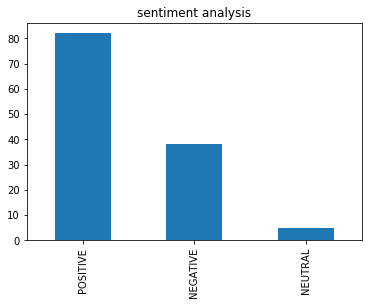

In [68]:
reviews.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

There seems to be more positive reviews in this analysis. This makes sense, I picked critically acclaimed movie franchises 
such as the dark knight and Fast & Furious franchises. 